# Notebook 3:  Agrupamiento Jerárquico y Redes de Kohonen 
En este notebook vamos a implementar dos algoritmos de clustering: el agrupamiento jeráquico  de clustering y los mapas autoorganizados (SOM) o redes de Kohonen en R. El objetivo es entender como funcionan estos algoritmos y  aprender a utilizarlos con un ejemplo simple. Recuerde instalar previamente el paquete kohonen en R.



**En lo que sigue, utilizaremos el método hclust, que permite realizar análisis de agrupamiento jerárquico**

In [1]:
help(hclust)

hclust {stats},R Documentation
d,a dissimilarity structure as produced by dist.
method,"the agglomeration method to be used. This should be (an unambiguous abbreviation of) one of ""ward.D"", ""ward.D2"", ""single"", ""complete"", ""average"" (= UPGMA), ""mcquitty"" (= WPGMA), ""median"" (= WPGMC) or ""centroid"" (= UPGMC)."
members,NULL or a vector with length size of d. See the ‘Details’ section.
x,an object of the type produced by hclust.
hang,The fraction of the plot height by which labels should hang below the rest of the plot. A negative value will cause the labels to hang down from 0.
check,"logical indicating if the x object should be checked for validity. This check is not necessary when x is known to be valid such as when it is the direct result of hclust(). The default is check=TRUE, as invalid inputs may crash R due to memory violation in the internal C plotting code."
labels,A character vector of labels for the leaves of the tree. By default the row names or row numbers of the original data are used. If labels = FALSE no labels at all are plotted.
"axes, frame.plot, ann",logical flags as in plot.default.
"main, sub, xlab, ylab",character strings for title. sub and xlab have a non-NULL default when there's a tree$call.
...,"Further graphical arguments. E.g., cex controls the size of the labels (if plotted) in the same way as text."


In [2]:
#ruta datos
#lee datos del archivo de texto como una matriz. La primera #columna se utiliza como vector de nombres de las filas
datos <-read.table("..//data//milk1.dat",row.names=1,dec=".",header=TRUE)
datos <- as.data.frame(datos)
dim(datos)
summary(datos)

[1] 25  5

     WATER          PROTEIN            FAT           LACTOSE     
 Min.   :44.90   Min.   : 0.600   Min.   : 1.00   Min.   :0.000  
 1st Qu.:71.30   1st Qu.: 3.000   1st Qu.: 3.40   1st Qu.:2.700  
 Median :82.00   Median : 5.900   Median : 6.30   Median :4.700  
 Mean   :78.18   Mean   : 6.212   Mean   :10.31   Mean   :4.132  
 3rd Qu.:87.70   3rd Qu.: 9.700   3rd Qu.:13.10   3rd Qu.:5.600  
 Max.   :90.40   Max.   :12.300   Max.   :42.00   Max.   :6.900  
      ASH        
 Min.   :0.1000  
 1st Qu.:0.5300  
 Median :0.8000  
 Mean   :0.8632  
 3rd Qu.:1.1000  
 Max.   :2.3000  

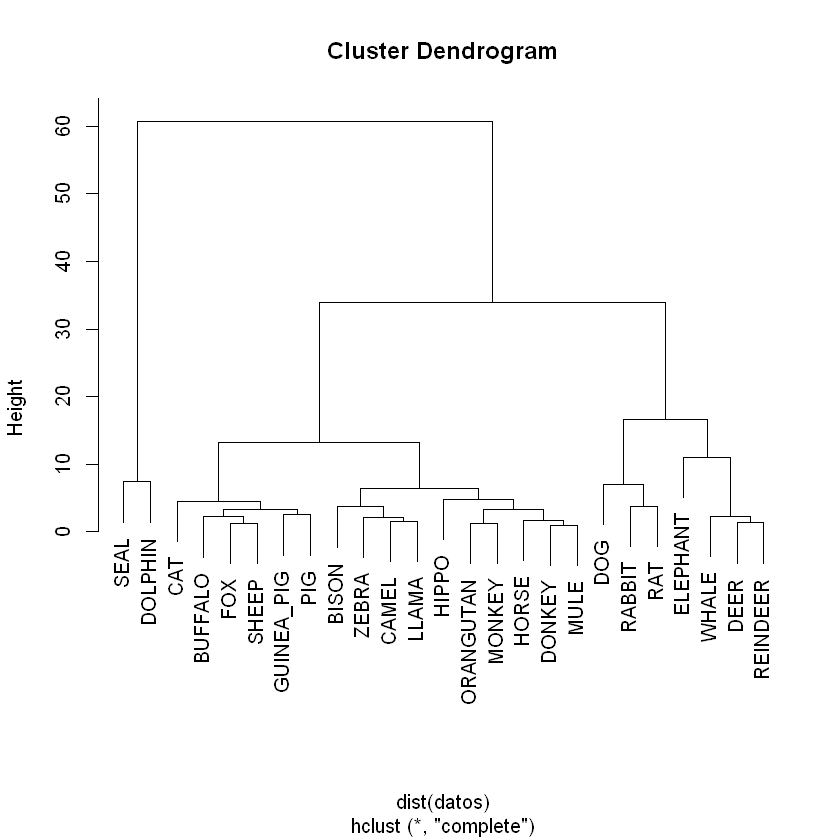

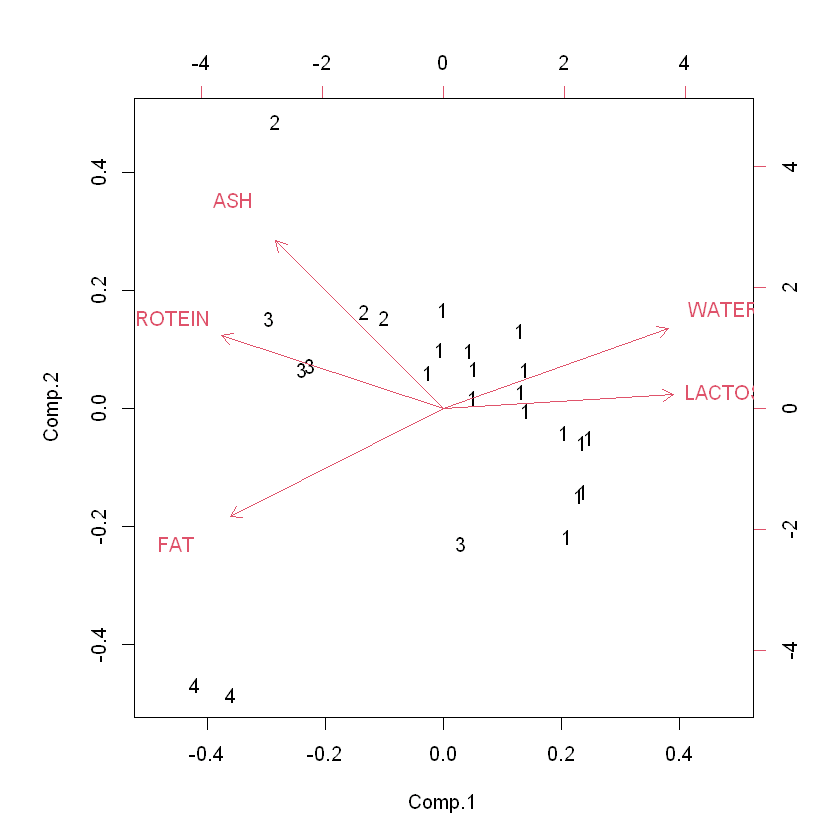

In [20]:
res3 <- hclust(dist(datos))
plot(res3)
res <- princomp(datos, cor=TRUE)
biplot(res, xlabs= cutree(res3,4))

**Ejercicio 1:** 

a) Explique como funciona el método hclust, describa parámetros de entrada y salida.

b) Interprete y comente los resultados obtenidos. 

c) Utilice otros parámetros en hclust y discuta como varían los resultados. 


#### Repuesta 1.a
Este método realiza un análisis de conglomerados jerárquico utilizando un conjunto de disimilitudes, es una técnica de análisis de datos que agrupa objetos en una estructura de tipo árbol binario llamada dendrograma, la cual permite descubrir estructuras de similitud entre observaciones y representarlas jerárquicamente. Inicialmente, cada observación va a representar a un grupo y, a continuación, el algoritmo procede iterativamente, uniendo en cada etapa las observaciones, hasta que solo queda un grupo.

Los parametros de entrada principales son:
- d: objeto de clase dist que representa la matriz de disimilitudes entre observaciones
- method: método de enlace para formar los clústeres. (complete, single, average, ward.D, ward.D2, mcquitty, median, centroid)
- members: vector numérico con el tamaño de cada objeto si no todos representan una única observación, proporciona la identificación de grupos iniciales. De esta forma, el algoritmo de conglomerados jerárquico puede iniciarse en medio del dendrograma

La salida tiene lo siguiente:
- merge: Es una matriz de (n-1) por 2, indica qué grupos se fusionaron en cada paso.
- height: valor con la altura (distancia) en la que se hicieron las fusiones.
- order: vector que indica el orden en que deben disponerse las hojas del dendrograma para evitar cruces.
- labels: etiquetas de las observaciones.
- method: el método de agrupamiento que se ha utilizado.
- calls: la llamada que produjo el resultado.
- dist.method: método utilizado para calcular las distancias.

#### Repuesta 1.b
El primer dendograma muestra un agrupamiento jerárquico de animales basado en similitud nutricional (grasa, proteina, agua, etc). El dendograma muestra como los animales se agrupan progresivamente en grupos a distintas alturas. En donde los grupos cercanos, que están más abajo en el dendograma tiene composiciones nutricionales más similares. Por ejemplo, "seal" y "dolphin" estan muy alejados de otros animales, lo que puede decir que tienen perfiles nutricionales muy distintos al resto.

En el bitplot, muestra la proyección de los datos sobre los dos primeros componentes principales, en donde se utilizaron 4 grupos o clústeres como lo indica el método, y los numeros 1,2,3,4 indican a que grupo pertenece cada observación.

#### Respuesta 1.c

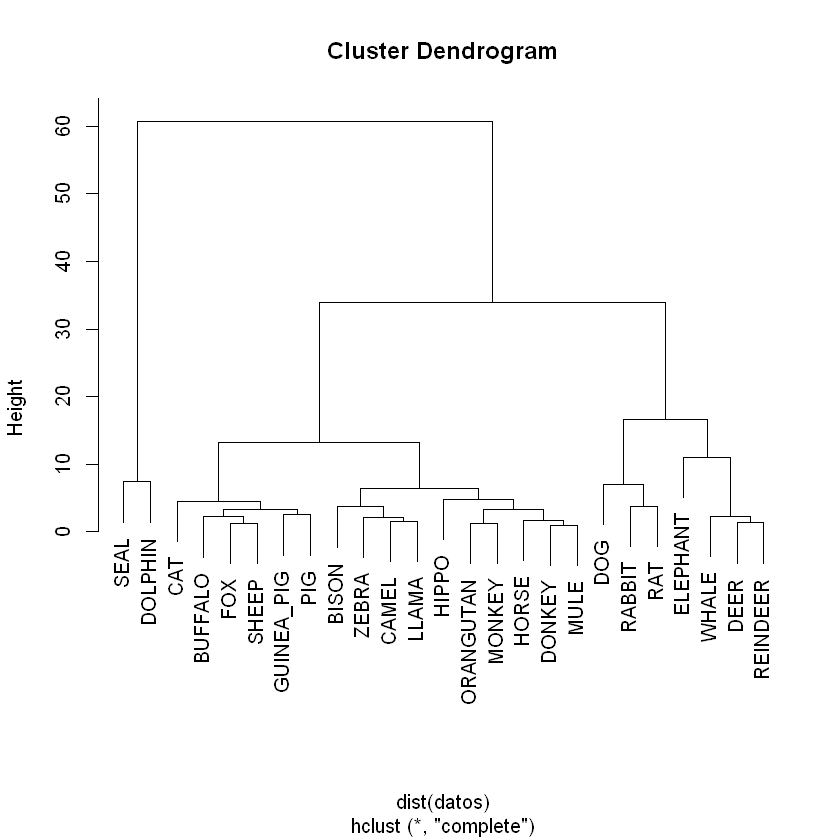

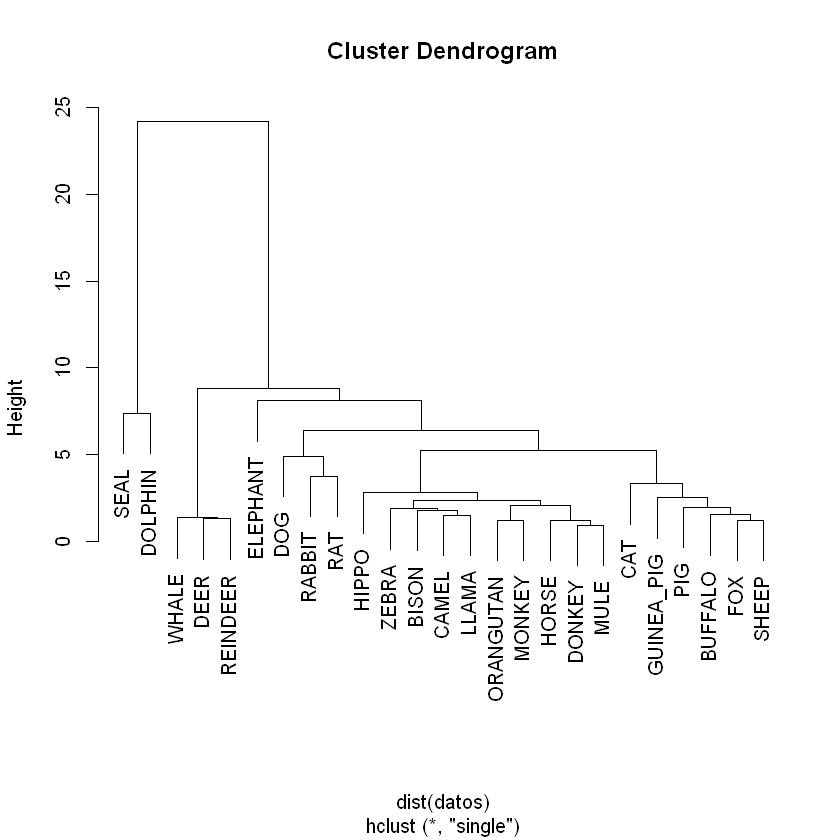

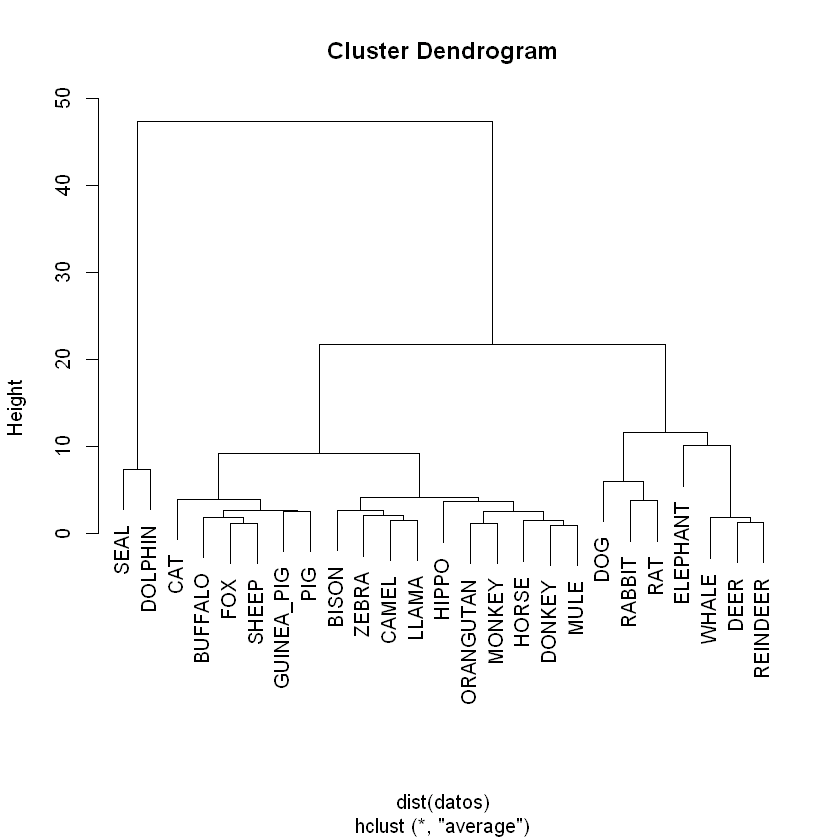

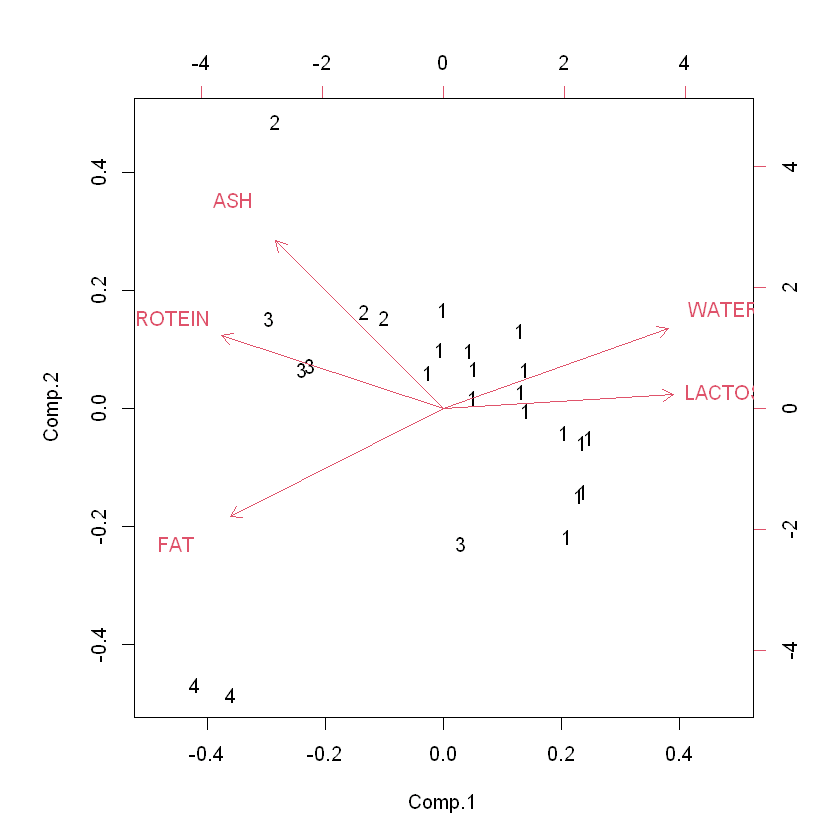

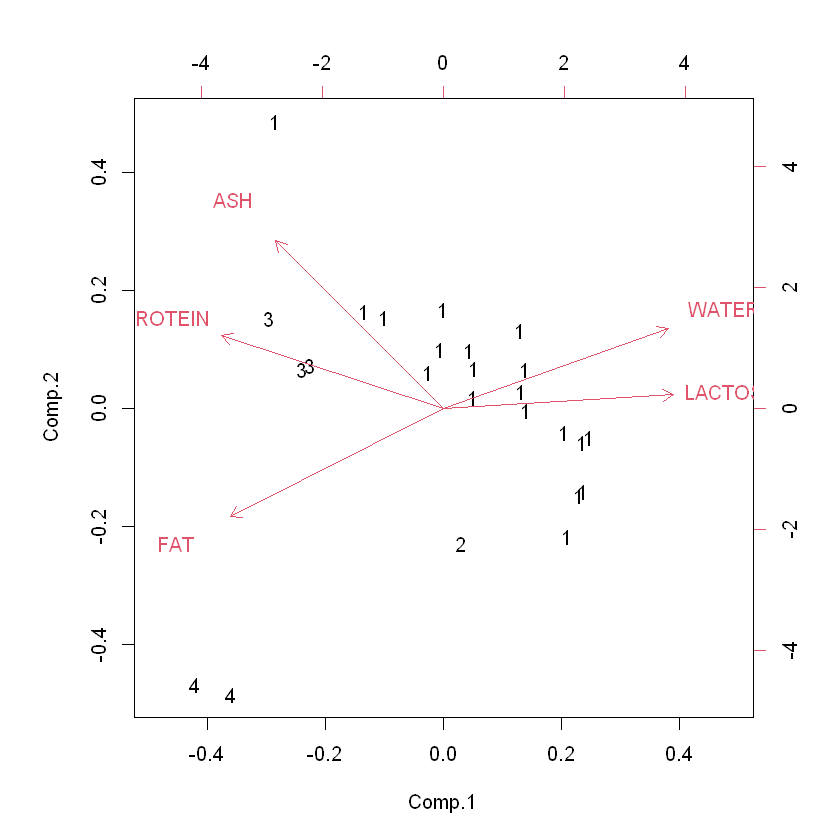

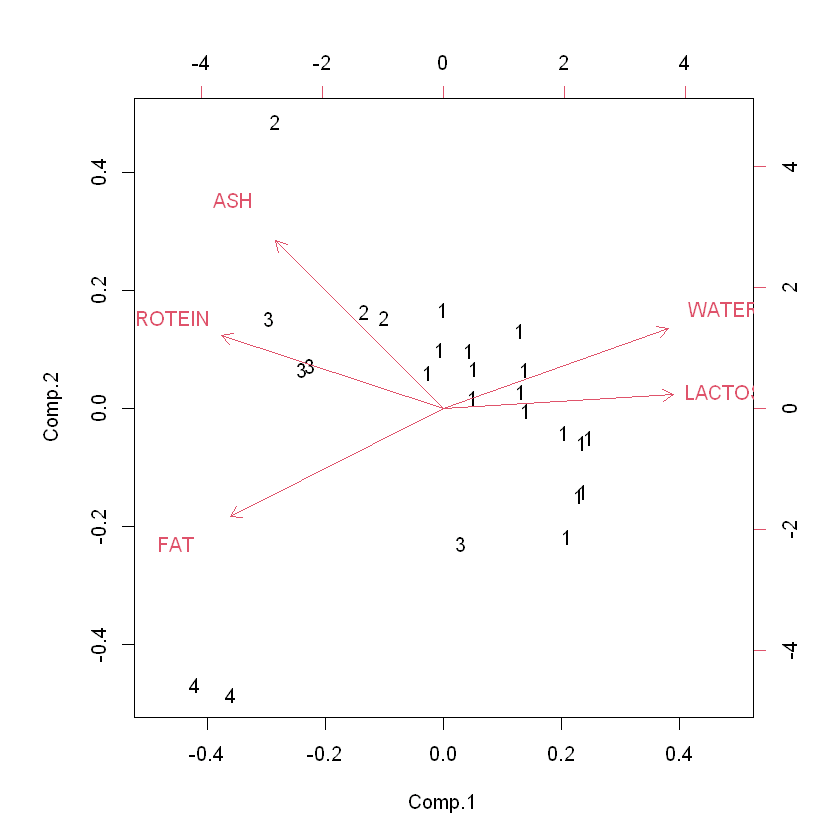

In [17]:
res4 <- hclust(dist(datos),method="single")
res5 <- hclust(dist(datos),method="average")
plot(res3)
plot(res4)
plot(res5)
biplot(res, xlabs= cutree(res3,4))
biplot(res, xlabs= cutree(res4,4))
biplot(res, xlabs= cutree(res5,4))

Para el conjunto de datos, se observan diferencias entre los distintos métodos, con el método single se ven que estan los grupos menos concentrados, a comparación con los métodos complete y average (el método complete viene por defecto en hclust, sino se le especifica), con estos dos últimos métodos, se observan grupos más concentrados.

**A continuación instalamos la biblioteca kohonen para utilizar som, el método de mapas autoorganizados que permite realizar un análisis de agrupamiento**

In [18]:
#install.packages("kohonen")
library(kohonen)
set.seed(7)

In [19]:
help(som)

supersom {kohonen},R Documentation
"X, Y","numerical data matrices, or factors. No data.frame objects are allowed - convert them to matrices first."
data,"list of data matrices (numerical) of factors. If a vector is entered, it will be converted to a one-column matrix. No data.frame objectss are allowed."
grid,a grid for the codebook vectors: see somgrid.
rlen,the number of times the complete data set will be presented to the network.
alpha,"learning rate, a vector of two numbers indicating the amount of change. Default is to decline linearly from 0.05 to 0.01 over rlen updates. Not used for the batch algorithm."
radius,"the radius of the neighbourhood, either given as a single number or a vector (start, stop). If it is given as a single number the radius will change linearly from radius to zero; as soon as the neighbourhood gets smaller than one only the winning unit will be updated. Note that the default before version 3.0 was to run from radius to -radius. If nothing is supplied, the default is to start with a value that covers 2/3 of all unit-to-unit distances."
whatmap,What data layers to use. If unspecified all layers are used.
user.weights,"the weights given to individual layers. This can be a single number (all layers have the same weight, the default), a vector of the same length as the whatmap argument, or a vector of the same length as the data argument. In xyf maps, this argument provides the same functionality as the now-deprecated xweight argument that was used prior to version 3.0."
maxNA.fraction,the maximal fraction of values that may be NA to prevent the row to be removed.
keep.data,"if TRUE, return original data and mapping information. If FALSE, only return the trained map (in essence the codebook vectors)."


[[1]]
        WATER    PROTEIN        FAT     LACTOSE         ASH
V1 -2.5356874  1.0729314  2.6899058 -2.02042124 -0.32965999
V2 -0.7799697  1.2599683  0.6351271 -0.96937503  1.62080612
V3  0.1782588  0.2255258 -0.2440329  0.02172521  0.05902769
V4  0.8071564 -0.9927413 -0.7233456  0.86466273 -0.73162491



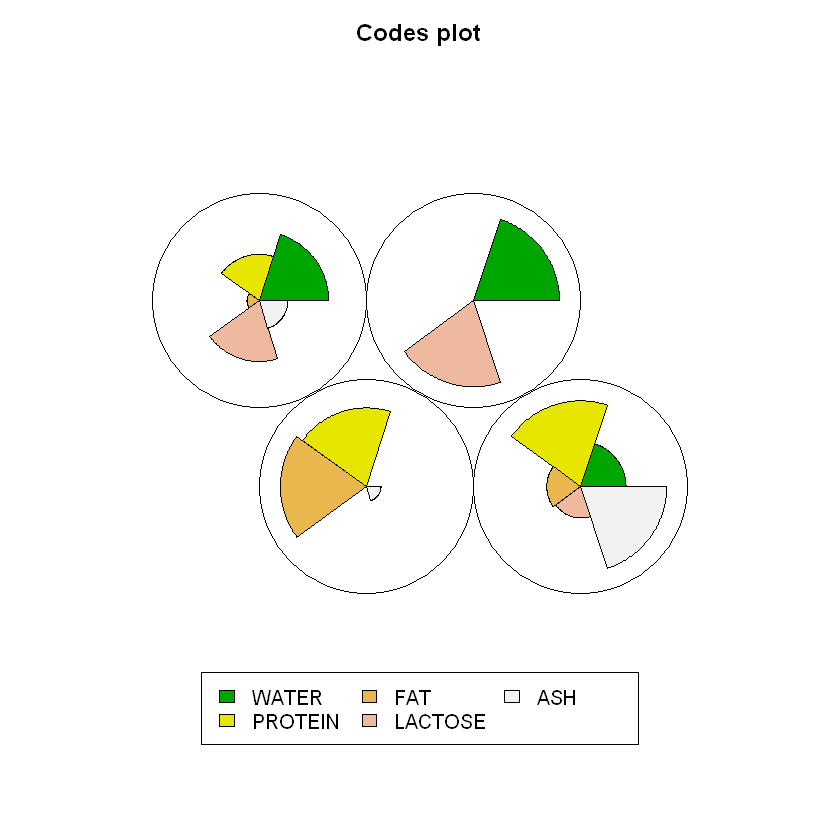

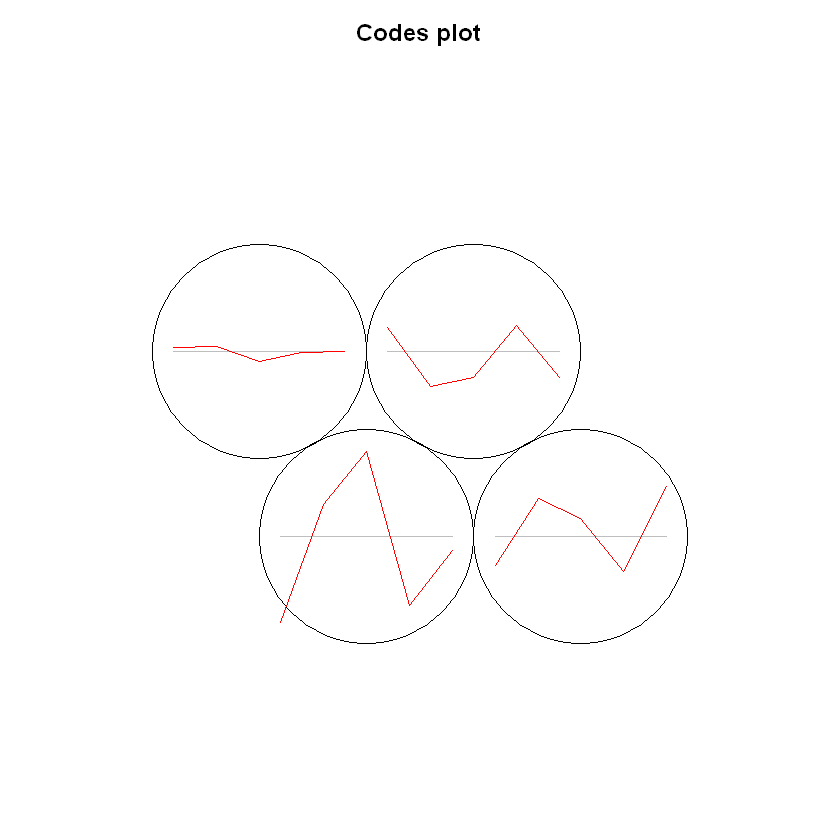

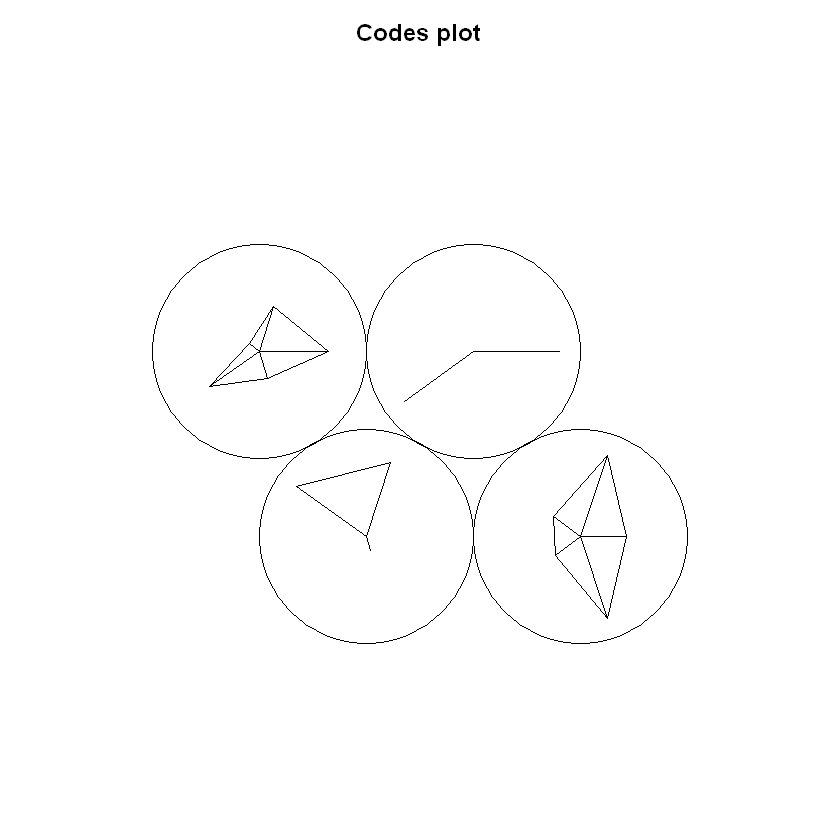

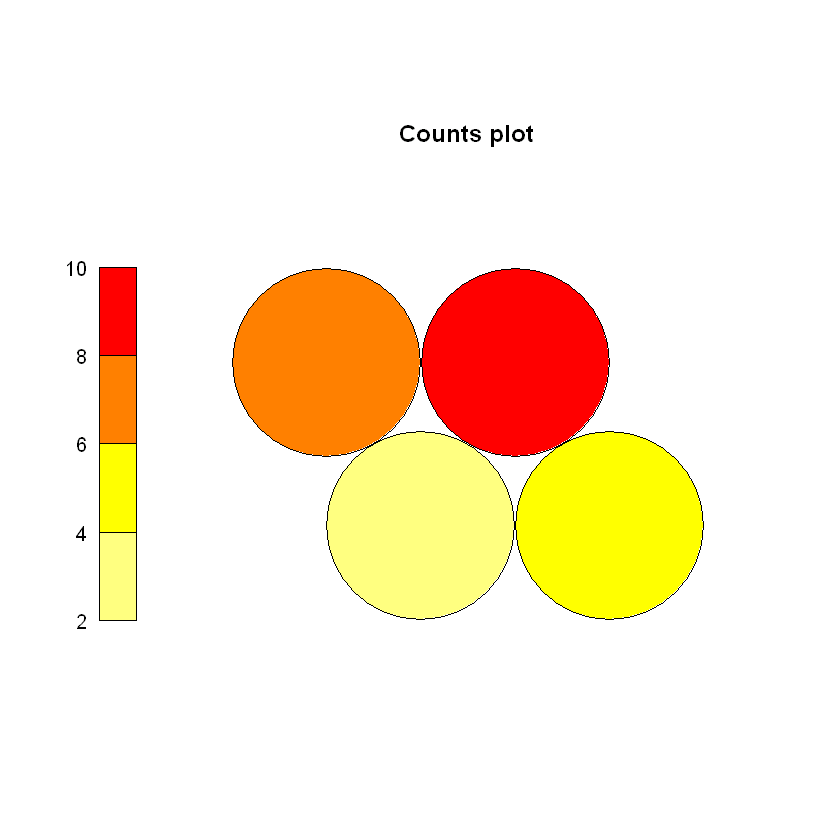

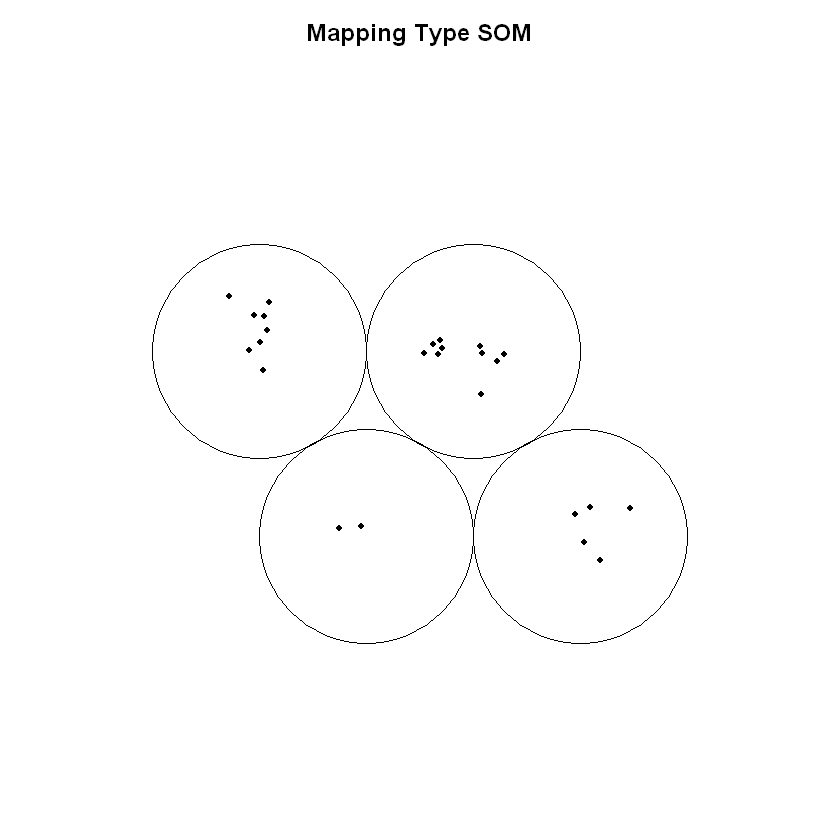

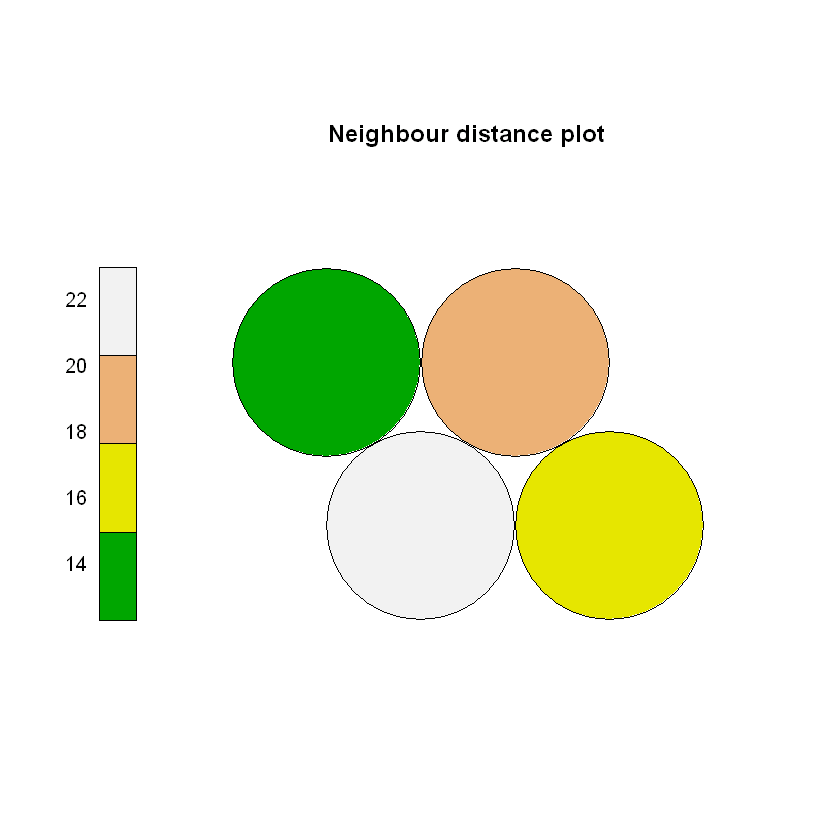

In [11]:
#create SOM grid
sommap <- som(scale(datos), rlen=1000, grid = somgrid(2, 2, "hexagonal"))
print(sommap$codes)
plot(sommap,  codeRendering="segments")
plot(sommap,  codeRendering="lines")
plot(sommap,  codeRendering="stars")

colors <- function(n, alpha = 1) {
    rev(heat.colors(n, alpha))
}

plot(sommap, type = "counts", palette.name = colors, heatkey = TRUE)

plot(sommap, type = "mapping", pchs = 20, main = "Mapping Type SOM")

plot(sommap, type = "dist.neighbours", palette.name = terrain.colors)


**Ejercicio 2:** 

a) Explique como funciona el método som, describa parámetros de entrada y salida y los gráficos obtenidos.

b) Modifique parámetros de entrada. Interprete y comente los resultados obtenidos. 

c) Compare estos resultados con los del agrupamiento jerárquico. Discuta sus resultados.

**Ejercicio 3:**

Considere el subconjunto de datos del archivo tiposMusica.csv que ha estudiado en las tareas anteriores. 

a) Escoja dos de los cuatro métodos de agrupamiento estudiado en esta unidad y realice un análisis de agrupamiento con estos datos. 

b) Compare sus resultados con la medida de calidad de su preferencia y considerando la etiqueta del tipo de música disponible en la primera columna de datos. Discuta sus resultados.